/home/sr/miniconda3/envs/planogram/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sr/miniconda3/envs/planogram/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total windows processed: 1736
Total runtime of the program is 74.7843279838562
Total windows processed: 1736
0.6607615
0.9238836
0.88636374
0.8809806
0.9432591
0.9347515
0.8598509
0.8116008
0.937464
0.77479273
0.8520798
0.7691691
0.8411242
0.8932095
0.92700416
0.8502556
0.9488636
0.94782
0.858269
0.6607615
0.9241223
0.6828659
0.8697661
0.94906014
0.83811545
0.75003684
0.9150883
0.9466485
0.92263293
0.7614527
0.8944252


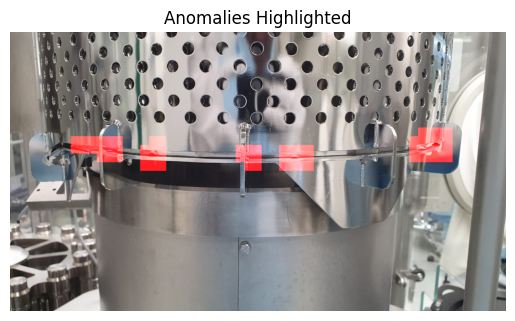

In [55]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torchvision.models import resnet101
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
import cv2
import time
def preprocess_image(image_path):
    """Load and preprocess an image while retaining original dimensions."""
    transform = transforms.Compose([
        # transforms.Resize((1080, 1920)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    # image = Image.open(image_path).convert('RGB')
    # return transform(image).unsqueeze(0)  # Add batch dimension

    image = Image.open(image_path).convert('L')  # Convert image to greyscale
    image = image.convert('RGB')  # Convert back to 3-channel for model compatibility
    return transform(image).unsqueeze(0)  # Add batch dimension

def extract_embeddings(model, image, window_size, stride):
    """Extract embeddings for all sliding windows in the image."""
    _, _, height, width = image.shape
    embeddings = []
    positions = []

    # Ensure the image size is large enough for sliding window
    if height < window_size or width < window_size:
        raise ValueError(f"Image size ({height}, {width}) is smaller than the window size ({window_size}).")

    count = 0
    # Sliding window loop
    for y in range(0, height - window_size + 1, stride):
        for x in range(0, width - window_size + 1, stride):
            count += 1
            # Extract the window
            window = image[:, :, y:y+window_size, x:x+window_size]

            # Visualize the window (optional for debugging)
            # window_rgb = TF.to_pil_image(window.squeeze(0))  # Convert tensor to image
            # plt.imshow(window_rgb)
            # plt.title(f"Window {count} at position ({x}, {y})")
            # plt.axis('off')
            # plt.show()

            # Pass through the model to get embeddings
            with torch.no_grad():
                embedding = model(window).squeeze().cpu().numpy()

            embeddings.append(embedding)
            positions.append((x, y))

    print(f"Total windows processed: {count}")
    return np.array(embeddings), positions

def visualize_anomalies(image_path, positions, scores, threshold, stride, window_size):
    """Visualize anomalies on the target image."""
    image = Image.open(image_path).convert('RGB')
    image = np.array(image)

    for (x, y), score in zip(positions, scores):
        if score < threshold:
            # Highlight the anomaly
            print(score)
            image[y:y+window_size, x:x+window_size, 0] = 255  # Red color overlay
            
            # cropped_region = image[y:y+window_size, x:x+window_size]
            # plt.figure()
            # plt.imshow(cropped_region)
            # plt.title(f"Anomaly Score: {score}")
            # plt.axis('off')
            # plt.show()

    plt.imshow(image)
    plt.title("Anomalies Highlighted")
    plt.axis('off')
    plt.savefig('opjnj_overestimate.jpg')
    plt.show()
    # cv2.imwrite(image,'op1.jpg')

def main(reference_image_path, target_image_path, window_size=56, stride=28, threshold=0.95):
    # Load pretrained ResNet model
    model = resnet50(pretrained=True)
    model = nn.Sequential(*list(model.children())[:-1])  # Remove classification layer
    model.eval()

    # Preprocess images without resizing
    reference_image = preprocess_image(reference_image_path)
    target_image = preprocess_image(target_image_path)

    # Extract embeddings for reference and target images
    begin=time.time()
    reference_embeddings, positions = extract_embeddings(model, reference_image, window_size, stride)
    end=time.time()
    # total time taken 
    print(f"Total runtime of the program is {end - begin}") 
    target_embeddings, _ = extract_embeddings(model, target_image, window_size, stride)

    # Compute cosine similarity for each window
    scores = cosine_similarity(reference_embeddings, target_embeddings).diagonal()
    print(min(scores))

    # Visualize anomalies
    visualize_anomalies(target_image_path, positions, scores, threshold, stride, window_size)

if __name__ == "__main__":
    # Paths to the reference and target images
    reference_image_path = "/home/sr/Anick/JNJ_Lineclearing/Untitled8.jpeg"
    target_image_path = "/home/sr/Downloads/Test_Image_multiple v2.jpg"

    # Run the anomaly detection
    main(reference_image_path, target_image_path)


/home/sr/miniconda3/envs/planogram/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sr/miniconda3/envs/planogram/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total windows processed: 1736
Total runtime of the program is 34.76381278038025
Total windows processed: 1736
0.6607615
0.9238836
0.88636374
0.8809806
0.9432591
0.9347515
0.8598509
0.8116008
0.937464
0.77479273
0.8520798
0.7691691
0.8411242
0.8932095
0.92700416
0.8502556
0.9488636
0.94782
0.858269
0.6607615
0.9241223
0.6828659
0.8697661
0.94906014
0.83811545
0.75003684
0.9150883
0.9466485
0.92263293
0.7614527
0.8944252


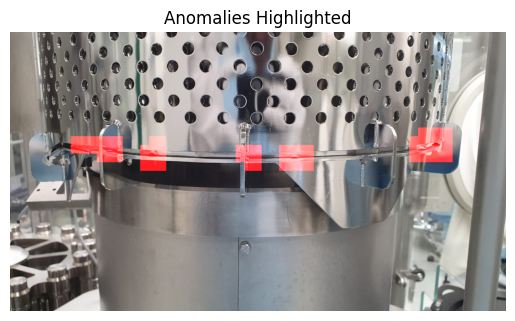

In [43]:
if __name__ == "__main__":
    # Paths to the reference and target images
    reference_image_path = "/home/sr/Anick/JNJ_Lineclearing/Untitled8.jpeg"
    target_image_path = "/home/sr/Downloads/Test_Image_multiple v2.jpg"

    # Run the anomaly detection
    main(reference_image_path, target_image_path)

In [4]:
!pwd

/home/sr/Anick/JNJ_Lineclearing/notebooks


### Convert to ONNX

In [6]:
import torch
import torchvision.models as models

# Load pre-trained ResNet-50 model
resnet50 = models.resnet50(pretrained=True)

# Remove the classification head (fully connected layer)
# resnet50 = torch.nn.Sequential(*list(resnet50.children())[:-1])

# Set to evaluation mode
resnet50.eval()

# Dummy input for ONNX export
dummy_input = torch.randn(1, 3, 224, 224)

# Export to ONNX
torch.onnx.export(
    resnet50, 
    dummy_input, 
    "resnet50.onnx", 
    input_names=["input"], 
    output_names=["output"], 
    dynamic_axes={"input": {0: "batch_size"}, "embedding": {0: "batch_size"}},
    opset_version=11
)

print("ResNet-50 embedding model exported to resnet50_embedding.onnx")


/home/sr/miniconda3/envs/planogram/lib/python3.11/site-packages/torch/onnx/utils.py:1963: UserWarning: Provided key embedding for dynamic axes is not a valid input/output name
  warnings.warn(


ResNet-50 embedding model exported to resnet50_embedding.onnx


### Same algo in openvino

Available OpenVINO devices: ['CPU', 'GNA', 'GPU']
Using GPU for inference.
Total windows processed: 1736
(1736, 2048)
Total windows processed: 1736
Total runtime: 106.0734965801239
0.9110878
0.97472715
0.96577245
0.9742416
0.970139
0.9864707
0.9597693
0.9722559
0.9769806
0.97267437
0.97270155
0.9334979
0.94066167
0.95521307
0.9871273
0.94732976
0.9760817
0.9342313
0.97370976
0.98233396
0.9840697
0.9885056
0.98584473
0.9460547
0.9110878
0.97943765
0.9531693
0.9580915
0.96457106
0.9731997
0.9704919
0.98562825
0.98569816
0.9856085
0.96681535
0.94600046
0.9782427


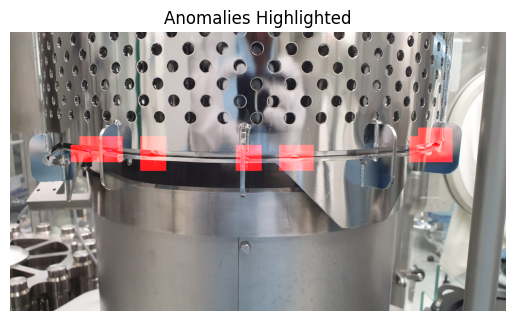

In [41]:
import numpy as np
import cv2
import time
import openvino as ov
from openvino.runtime import Core
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

def load_openvino_model(model_path):
    """Load an OpenVINO model for inference and check available devices."""
    core = Core()
    
    # Print available devices
    available_devices = core.available_devices
    print("Available OpenVINO devices:", available_devices)
    
    if "GPU" in available_devices:
        print("Using GPU for inference.")
        model = core.compile_model(model_path, "GPU")  # Use GPU
    elif "CPU" in available_devices:
        print("GPU not found, falling back to CPU.")
        model = core.compile_model(model_path, "CPU")  # Fallback to CPU
    else:
        raise RuntimeError("No compatible device found for OpenVINO!")

    return model

# def load_openvino_model(model_path):
#     core = Core()
#     if "GPU" in core.available_devices:
#         model = core.compile_model(model_path, "GPU")
#         print("Using GPU for inference.")
#     else:
#         model = core.compile_model(model_path, "CPU")
#         print("GPU not found, falling back to CPU.")

#     # Enable async inference
#     infer_request = model.create_infer_request()
#     return model, infer_request



def preprocess_image(image_path):
    """Preprocess an image to match OpenVINO model input format."""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.convert('RGB')  # Convert back to 3-channel
    # print(image.shape)
    return transform(image).unsqueeze(0).numpy()  # Convert to numpy

def extract_embeddings(model, image, window_size, stride):
    """Extract embeddings from an OpenVINO model using a sliding window."""
    _, _, height, width = image.shape
    embeddings = []
    positions = []

    if height < window_size or width < window_size:
        raise ValueError(f"Image size ({height}, {width}) is too small for window size ({window_size}).")

    count = 0
    for y in range(0, height - window_size + 1, stride):
        for x in range(0, width - window_size + 1, stride):
            count += 1
            window = image[:, :, y:y+window_size, x:x+window_size]

            # Resize window to match model input size [1,3,224,224]
            window_resized = cv2.resize(window.squeeze().transpose(1, 2, 0), (224, 224))
            window_resized = np.expand_dims(window_resized.transpose(2, 0, 1), axis=0)  # Convert back to shape [1, 3, 224, 224]

            # Inference using OpenVINO
            embedding = model([window_resized])[0].squeeze()
            embeddings.append(embedding)
            positions.append((x, y))

    print(f"Total windows processed: {count}")
    return np.array(embeddings), positions



# def extract_embeddings(model, infer_request, image, window_size, stride, batch_size=16):
#     embeddings = []
#     positions = []
    
#     _, _, height, width = image.shape

#     windows = []
#     positions_batch = []

#     count = 0
#     for y in range(0, height - window_size + 1, stride):
#         for x in range(0, width - window_size + 1, stride):
#             count += 1
#             window = image[:, :, y:y+window_size, x:x+window_size]
#             window_resized = cv2.resize(window.squeeze().transpose(1, 2, 0), (224, 224))
#             window_resized = np.expand_dims(window_resized.transpose(2, 0, 1), axis=0)

#             windows.append(window_resized)
#             positions_batch.append((x, y))

#             if len(windows) == batch_size:
#                 windows_np = np.vstack(windows)
#                 infer_request.start_async({0: windows_np})  # Start async request
#                 infer_request.wait()  # Wait for completion
#                 batch_embeddings = infer_request.get_output_tensor(0).data
#                 embeddings.extend(batch_embeddings)
#                 positions.extend(positions_batch)
#                 windows, positions_batch = [], []

#     if windows:
#         windows_np = np.vstack(windows)
#         infer_request.start_async({0: windows_np})
#         infer_request.wait()
#         batch_embeddings = infer_request.get_output_tensor(0).data
#         embeddings.extend(batch_embeddings)
#         positions.extend(positions_batch)

#     print(f"Total windows processed: {count}")
#     return np.array(embeddings), positions


def visualize_anomalies(image_path, positions, scores, threshold, window_size):
    """Overlay detected anomalies on the image."""
    image = Image.open(image_path).convert('RGB')
    image = np.array(image)

    for (x, y), score in zip(positions, scores):
        if score < threshold:
            print(score)
            image[y:y+window_size, x:x+window_size, 0] = 255  # Highlight in red

    plt.imshow(image)
    plt.title("Anomalies Highlighted")
    plt.axis('off')
    plt.savefig('openvino_anomalies.jpg')
    plt.show()

def main(reference_image_path, target_image_path, model_path, window_size=56, stride=28, threshold=0.99):
    model = load_openvino_model(model_path)

    reference_image = preprocess_image(reference_image_path)
    target_image = preprocess_image(target_image_path)

    begin = time.time()
    reference_embeddings, positions = extract_embeddings(model, reference_image, window_size, stride)
    print(reference_embeddings.shape)
    target_embeddings, _ = extract_embeddings(model, target_image, window_size, stride)
    end = time.time()

    print(f"Total runtime: {end - begin}")

    scores = cosine_similarity(reference_embeddings, target_embeddings).diagonal()
    print(min(scores))

    visualize_anomalies(target_image_path, positions, scores, threshold, window_size)


# def main(reference_image_path, target_image_path, model_path, window_size=56, stride=28, threshold=0.97, batch_size=16):
#     # Load OpenVINO model and enable async inference
#     model, infer_request = load_openvino_model(model_path)

#     # Preprocess images
#     reference_image = preprocess_image(reference_image_path)
#     target_image = preprocess_image(target_image_path)

#     begin = time.time()
    
#     # Extract embeddings with batch processing and async inference
#     reference_embeddings, positions = extract_embeddings(model, infer_request, reference_image, window_size, stride, batch_size)
#     print(reference_embeddings.shape)
#     print(type(reference_embeddings))
#     target_embeddings, _ = extract_embeddings(model, infer_request, target_image, window_size, stride, batch_size)
    
#     end = time.time()
    
#     print(f"Total runtime: {end - begin} seconds")

#     # Compute cosine similarity scores
#     scores = cosine_similarity(reference_embeddings[:,:,0,0], target_embeddings[:,:,0,0]).diagonal()
#     print(f"Minimum similarity score: {min(scores)}")


#     # Visualize anomalies based on threshold
#     visualize_anomalies(target_image_path, positions, scores, threshold, window_size)


if __name__ == "__main__":
    reference_image_path = "/home/sr/Anick/JNJ_Lineclearing/Untitled8.jpeg"
    target_image_path = "/home/sr/Downloads/Test_Image_multiple v2.jpg"
    model_path = "/home/sr/Anick/JNJ_Lineclearing/notebooks/resnet50Embedding.xml"  # Provide OpenVINO IR model

    main(reference_image_path, target_image_path, model_path)


In [24]:
import openvino as ov
model=ov.convert_model('/home/sr/Anick/JNJ_Lineclearing/notebooks/resnet50_embedding.onnx')
ov.save_model(model,"resnet50Embedding.xml")

### Select ROI to reduce number of windows

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


/home/sr/miniconda3/envs/planogram/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sr/miniconda3/envs/planogram/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total windows processed: 19
Total windows processed: 19
Total runtime: 1.7504639625549316 seconds
Minimum similarity score: 0.8933389186859131
0.91412675
0.9180453
0.9753412
0.97446173
0.9285102
0.98757476
0.98999816
0.9811681
0.97490144
0.8933389


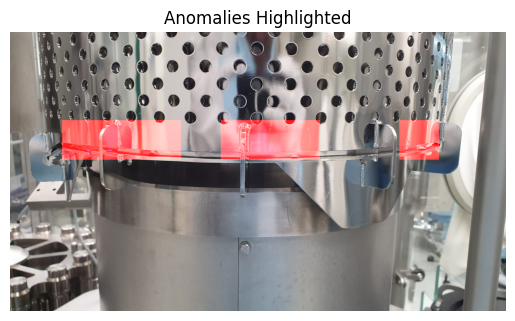

In [54]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import cv2
import time

def select_roi(image_path):
    """Open the image and allow the user to select a region of interest (ROI)."""
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        raise FileNotFoundError(f"Error: Unable to load image at {image_path}. Check if the file exists.")
    
    roi = cv2.selectROI("Select ROI and press ENTER", image, fromCenter=False, showCrosshair=True)
    cv2.destroyAllWindows()
    
    x, y, w, h = roi
    if w == 0 or h == 0:
        print("No ROI selected, using the full image.")
        return None  # No ROI selected

    return (x, y, w, h)


def preprocess_image(image_path, roi=None):
    """Load and preprocess an image while retaining original dimensions."""
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = Image.open(image_path).convert('RGB')
    
    if roi:
        x, y, w, h = roi
        image = image.crop((x, y, x + w, y + h))  # Crop the image to the selected ROI

    return transform(image).unsqueeze(0)  # Add batch dimension

def extract_embeddings(model, image, window_size, stride):
    """Extract embeddings for all sliding windows in the image."""
    _, _, height, width = image.shape
    embeddings = []
    positions = []

    if height < window_size or width < window_size:
        raise ValueError(f"Image size ({height}, {width}) is smaller than the window size ({window_size}).")

    count = 0
    for y in range(0, height - window_size + 1, stride):
        for x in range(0, width - window_size + 1, stride):
            count += 1
            window = image[:, :, y:y+window_size, x:x+window_size]

            with torch.no_grad():
                embedding = model(window).squeeze().cpu().numpy()

            embeddings.append(embedding)
            positions.append((x, y))

    print(f"Total windows processed: {count}")
    return np.array(embeddings), positions

def visualize_anomalies(image_path, positions, scores, threshold, window_size, roi=None):
    """Visualize anomalies on the target image."""
    image = cv2.imread(image_path)

    if roi:
        x, y, w, h = roi  # Use the selected ROI coordinates

    for (x_offset, y_offset), score in zip(positions, scores):
        if score < threshold:
            print(score)
            if roi:
                x1, y1 = x + x_offset, y + y_offset
            else:
                x1, y1 = x_offset, y_offset
            
            image[y1:y1+window_size, x1:x1+window_size, 2] = 255  # Highlight anomalies in red

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Anomalies Highlighted")
    plt.axis('off')
    plt.savefig('anomalies_detected.jpg')
    plt.show()

def main(reference_image_path, target_image_path, window_size=128, stride=64, threshold=0.99):
    # Let the user select the ROI
    roi = select_roi(target_image_path)

    # Load the ResNet model for feature extraction
    model = resnet50(pretrained=True)
    model = nn.Sequential(*list(model.children())[:-1])  # Remove classification layer
    model.eval()

    # Preprocess images with the selected ROI
    reference_image = preprocess_image(reference_image_path, roi)
    target_image = preprocess_image(target_image_path, roi)

    # Extract embeddings
    start_time = time.time()
    reference_embeddings, positions = extract_embeddings(model, reference_image, window_size, stride)
    target_embeddings, _ = extract_embeddings(model, target_image, window_size, stride)
    end_time = time.time()

    print(f"Total runtime: {end_time - start_time} seconds")

    # Compute cosine similarity for each window
    scores = cosine_similarity(reference_embeddings, target_embeddings).diagonal()
    print(f"Minimum similarity score: {min(scores)}")

    # Visualize anomalies in the selected ROI
    visualize_anomalies(target_image_path, positions, scores, threshold, window_size, roi)

if __name__ == "__main__":
    reference_image_path = "/home/sr/Anick/JNJ_Lineclearing/Untitled8.jpeg"
    target_image_path = "/home/sr/Downloads/Test_Image_multiple v2.jpg"

    main(reference_image_path, target_image_path)


### Running on cuda with ROI

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import cv2
from skimage.metrics import structural_similarity
import time

def select_roi(image_path):
    image = cv2.imread(image_path)
    roi = cv2.selectROI("Select ROI and Press ENTER", image, fromCenter=False, showCrosshair=True)
    cv2.destroyAllWindows()
    return roi

def preprocess_image(image, device):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform(image).unsqueeze(0).to(device)

def extract_embeddings(model, image, window_size, stride, roi_offset, device):
    _, _, height, width = image.shape
    embeddings, positions = [], []
    
    for y in range(0, height - window_size + 1, stride):
        for x in range(0, width - window_size + 1, stride):
            window = image[:, :, y:y+window_size, x:x+window_size]
            with torch.no_grad():
                embedding = model(window).squeeze().cpu().numpy()
            global_x, global_y = x + roi_offset[0], y + roi_offset[1]
            embeddings.append(embedding)
            positions.append((global_x, global_y, window_size, window_size))
    
    print(f"Number of windows = {len(embeddings)}")
    return np.array(embeddings), positions

def get_resnet_anomalies(reference_image, target_image, model, window_size, stride, threshold, roi_offset, device):
    start_time = time.time()
    ref_embeddings, positions = extract_embeddings(model, reference_image, window_size, stride, roi_offset, device)
    end_time1 = time.time()
    print(f"ResNet50 embedding extraction time: {end_time1 - start_time:.2f} seconds")
    tgt_embeddings, _ = extract_embeddings(model, target_image, window_size, stride, roi_offset, device)
    end_time = time.time()
    print(f"ResNet50 embedding extraction time for both: {end_time - start_time:.2f} seconds")
    
    scores = cosine_similarity(ref_embeddings, tgt_embeddings).diagonal()
    anomaly_windows = [positions[i] for i, score in enumerate(scores) if score < threshold]
    return anomaly_windows

def get_ssim_bounding_boxes(reference_roi, target_roi, roi_offset, scale_factor=1):
    ref_gray = cv2.cvtColor(reference_roi, cv2.COLOR_BGR2GRAY)
    tgt_gray = cv2.cvtColor(target_roi, cv2.COLOR_BGR2GRAY)
    
    score, diff = structural_similarity(ref_gray, tgt_gray, full=True)
    print(f"Image Similarity: {score * 100:.2f}%")
    
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    ssim_boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > 40]
    roi_x, roi_y, _, _ = roi_offset
    full_image_boxes = [(int(x * scale_factor) + roi_x, int(y * scale_factor) + roi_y, 
                         int(w * scale_factor), int(h * scale_factor)) for (x, y, w, h) in ssim_boxes]
    
    return full_image_boxes

def filter_boxes(ssim_boxes, resnet_windows):
    final_boxes = []
    for ssim_box in ssim_boxes:
        sx, sy, sw, sh = ssim_box
        for rx, ry, rw, rh in resnet_windows:
            if (sx < rx + rw and sx + sw > rx) and (sy < ry + rh and sy + sh > ry):
                final_boxes.append((sx, sy, sw, sh))
                break
    return final_boxes

def visualize_final_anomalies(target_img_path, final_boxes):
    target_img = cv2.imread(target_img_path)
    for (x, y, w, h) in final_boxes:
        cv2.rectangle(target_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow("Final Anomalies", target_img)
    cv2.imwrite("final_anomalies_multi_v2.jpg", target_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def main(reference_image_path, target_image_path, window_size=80, stride=80, threshold=0.98):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    roi = select_roi(target_image_path)
    roi_x, roi_y, roi_w, roi_h = roi
    if roi_w == 0 or roi_h == 0:
        print("❌ No ROI selected. Exiting.")
        return
    
    start_time_total = time.time()
    
    reference_image_full = cv2.imread(reference_image_path)
    target_image_full = cv2.imread(target_image_path)
    
    reference_roi = reference_image_full[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]
    target_roi = target_image_full[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]
    
    model = resnet50(pretrained=True).to(device)
    model = nn.Sequential(*list(model.children())[:-1])
    model.eval()
    
    start_time_total1 = time.time()

    reference_image_tensor = preprocess_image(Image.fromarray(reference_roi), device)
    target_image_tensor = preprocess_image(Image.fromarray(target_roi), device)
    
    resnet_anomalies = get_resnet_anomalies(reference_image_tensor, target_image_tensor, model, window_size, stride, threshold, roi, device)
    ssim_boxes = get_ssim_bounding_boxes(reference_roi, target_roi, roi)
    final_boxes = filter_boxes(ssim_boxes, resnet_anomalies)
    visualize_final_anomalies(target_image_path, final_boxes)
    
    end_time_total = time.time()
    print(f"Total execution time after ROI selection: {end_time_total - start_time_total1:.2f} seconds")

if __name__ == "__main__":
    reference_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/image_jnj_input/Untitled8.jpeg"
    target_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/image_jnj_input/Test_Image_multiple-v2.jpg"
    main(reference_image_path, target_image_path)


Using device: cuda
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


/home/sr/env/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sr/env/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Number of windows = 51
ResNet50 embedding extraction time: 1.08 seconds
Number of windows = 51
ResNet50 embedding extraction time for both: 1.97 seconds
Image Similarity: 99.49%
Total execution time after ROI selection: 4.66 seconds


### Running resnet on ssim boxes

In [30]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from skimage.metrics import structural_similarity
import time

def preprocess_image(image, device):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform(image).unsqueeze(0).to(device)

def extract_embeddings(model, image, boxes, device):
    embedding_extraction_time_start = time.time()    
    num_window=0
    embeddings, positions = [], []
    for (x, y, w, h) in boxes:
        num_window = num_window+1
        window = image[:, :, y:y+h, x:x+w]
        with torch.no_grad():
            embedding = model(window).squeeze().cpu().numpy()
        embeddings.append(embedding)
        positions.append((x, y, w, h))

    embedding_extraction_time_end = time.time() 

    print(f"number of windows : {num_window}")
    print(f"total embedding time for {num_window} windows : {embedding_extraction_time_end-embedding_extraction_time_start} seconds")
    return np.array(embeddings), positions

def get_resnet_anomalies(reference_image, target_image, model, ssim_boxes, threshold, device):
    ref_embeddings, positions = extract_embeddings(model, reference_image, ssim_boxes, device)
    tgt_embeddings, _ = extract_embeddings(model, target_image, ssim_boxes, device)
    
    scores = cosine_similarity(ref_embeddings, tgt_embeddings).diagonal()
    anomaly_windows = [positions[i] for i, score in enumerate(scores) if score < threshold]
    return anomaly_windows

def get_ssim_bounding_boxes(reference_roi, target_roi):
    ref_gray = cv2.cvtColor(reference_roi, cv2.COLOR_BGR2GRAY)
    tgt_gray = cv2.cvtColor(target_roi, cv2.COLOR_BGR2GRAY)
    
    score, diff = structural_similarity(ref_gray, tgt_gray, full=True)
    print(f"Image Similarity: {score * 100:.2f}%")
    
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    ssim_boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > 100]
    
    return ssim_boxes

def visualize_final_anomalies(target_img_path, final_boxes):
    target_img = cv2.imread(target_img_path)
    for (x, y, w, h) in final_boxes:
        cv2.rectangle(target_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow("Final Anomalies", target_img)
    cv2.imwrite("final_anomalies_filtered.jpg", target_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def main(reference_image_path, target_image_path, threshold=0.5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    reference_image_full = cv2.imread(reference_image_path)
    target_image_full = cv2.imread(target_image_path)
    
    ssim_start_time=time.time()
    ssim_boxes = get_ssim_bounding_boxes(reference_image_full, target_image_full)
    ssim_end_time=time.time()
    print(f"ssim calc time : {ssim_end_time-ssim_start_time} seconds")

    model_load_time_start=time.time()
    model = resnet50(pretrained=True).to(device)
    model = nn.Sequential(*list(model.children())[:-1])
    model.eval()
    model_load_time_end=time.time()
    print(f"model loading time : {model_load_time_end-model_load_time_start} seconds")    

    reference_image_tensor = preprocess_image(Image.fromarray(reference_image_full), device)
    target_image_tensor = preprocess_image(Image.fromarray(target_image_full), device)
    
    resnet_anomalies = get_resnet_anomalies(reference_image_tensor, target_image_tensor, model, ssim_boxes, threshold, device)

    total_end_time=time.time()
    print(f"total time : {total_end_time-ssim_start_time-(model_load_time_end-model_load_time_start):.2f} seconds")
    visualize_final_anomalies(target_image_path, resnet_anomalies)
    
if __name__ == "__main__":
    # reference_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/image_jnj_input/Untitled8.jpeg"
    # target_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/image_jnj_input/Test_Image_multiple-v2.jpg"
    
    reference_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/images/frame_1864.jpg"
    target_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/images/frame_1904.jpg"
    main(reference_image_path, target_image_path)



Using device: cuda
Image Similarity: 97.55%
ssim calc time : 0.37357378005981445 seconds


/home/sr/env/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sr/env/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model loading time : 0.8040039539337158 seconds
number of windows : 34
total embedding time for 34 windows : 0.7076423168182373 seconds
number of windows : 34
total embedding time for 34 windows : 0.574432373046875 seconds
total time : 1.88 seconds


### Using manhattan/euclidian instead of cosine

#### restnet on ROI -----> ssim on ROI ------> box matchig

In [63]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import cv2
from skimage.metrics import structural_similarity
import time
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

def select_roi(image_path):
    image = cv2.imread(image_path)
    roi = cv2.selectROI("Select ROI and Press ENTER", image, fromCenter=False, showCrosshair=True)
    cv2.destroyAllWindows()
    return roi

def preprocess_image(image, device):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform(image).unsqueeze(0).to(device)

def extract_embeddings(model, image, window_size, stride, roi_offset, device):
    _, _, height, width = image.shape
    embeddings, positions = [], []
    
    for y in range(0, height - window_size + 1, stride):
        for x in range(0, width - window_size + 1, stride):
            window = image[:, :, y:y+window_size, x:x+window_size]
            with torch.no_grad():
                embedding = model(window).squeeze().cpu().numpy()
            global_x, global_y = x + roi_offset[0], y + roi_offset[1]
            embeddings.append(embedding)
            positions.append((global_x, global_y, window_size, window_size))
    
    print(f"Number of windows = {len(embeddings)}")
    return np.array(embeddings), positions

def get_resnet_anomalies(reference_image, target_image, model, window_size, stride, threshold, roi_offset, device, metric="cosine"):
    start_time = time.time()
    
    ref_embeddings, positions = extract_embeddings(model, reference_image, window_size, stride, roi_offset, device)
    tgt_embeddings, _ = extract_embeddings(model, target_image, window_size, stride, roi_offset, device)

    end_time = time.time()
    print(f"ResNet50 embedding extraction time: {end_time - start_time:.2f} seconds")
    
    sim_start_time=time.time()
    if metric == "cosine":
        scores = cosine_similarity(ref_embeddings, tgt_embeddings).diagonal()
    elif metric == "manhattan":
        threshold_factor=2
        scores = manhattan_distances(ref_embeddings, tgt_embeddings).diagonal()
        mean_dist = np.mean(scores)
        std_dist = np.std(scores)
        threshold = mean_dist + threshold_factor * std_dist
        print(f"min score: {min(scores)}")
        print(f"max score: {max(scores)}")
        anomalies = [positions[i] for i, score in enumerate(scores) if score > threshold]  # Higher distance = more anomalous
        return anomalies

    elif metric == "euclidean":
        scores = -euclidean_distances(ref_embeddings, tgt_embeddings).diagonal()
    else:
        raise ValueError("Unsupported metric! Choose 'cosine', 'manhattan', or 'euclidean'.")
    
    sim_end_time=time.time()
    print(f"similarity calculation time : {sim_end_time-sim_start_time} seconds")
    

    # for score in scores:
    #     # if(score<threshold):
    #     print(score)
    print(f"min score: {min(scores)}")
    print(f"max score: {max(scores)}")

    anomaly_windows = [positions[i] for i, score in enumerate(scores) if score < threshold]
    return anomaly_windows

def get_ssim_bounding_boxes(reference_roi, target_roi, roi_offset, scale_factor=1):
    ref_gray = cv2.cvtColor(reference_roi, cv2.COLOR_BGR2GRAY)
    tgt_gray = cv2.cvtColor(target_roi, cv2.COLOR_BGR2GRAY)
    
    score, diff = structural_similarity(ref_gray, tgt_gray, full=True)
    print(f"Image Similarity: {score * 100:.2f}%")
    
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    ssim_boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > 100]
    roi_x, roi_y, _, _ = roi_offset
    full_image_boxes = [(int(x * scale_factor) + roi_x, int(y * scale_factor) + roi_y, 
                         int(w * scale_factor), int(h * scale_factor)) for (x, y, w, h) in ssim_boxes]
    
    return full_image_boxes

def filter_boxes(ssim_boxes, resnet_windows):
    final_boxes = []
    for ssim_box in ssim_boxes:
        sx, sy, sw, sh = ssim_box
        for rx, ry, rw, rh in resnet_windows:
            if (sx < rx + rw and sx + sw > rx) and (sy < ry + rh and sy + sh > ry):
                final_boxes.append((sx, sy, sw, sh))
                break
    return final_boxes

def visualize_final_anomalies(target_img_path, final_boxes):
    target_img = cv2.imread(target_img_path)
    for (x, y, w, h) in final_boxes:
        cv2.rectangle(target_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow("Final Anomalies", target_img)
    cv2.imwrite("final_anomalies_multi_v2.jpg", target_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def main(reference_image_path, target_image_path, window_size=80, stride=80, threshold=0.58):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    roi = select_roi(target_image_path)
    roi_x, roi_y, roi_w, roi_h = roi
    if roi_w == 0 or roi_h == 0:
        print("❌ No ROI selected. Exiting.")
        return
    
    start_time_total = time.time()
    
    reference_image_full = cv2.imread(reference_image_path)
    target_image_full = cv2.imread(target_image_path)
    
    reference_roi = reference_image_full[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]
    target_roi = target_image_full[roi_y:roi_y+roi_h, roi_x:roi_x+roi_w]
    
    model = resnet50(pretrained=True).to(device)
    model = nn.Sequential(*list(model.children())[:-1])
    model.eval()
    
    start_time_total1 = time.time()

    reference_image_tensor = preprocess_image(Image.fromarray(reference_roi), device)
    target_image_tensor = preprocess_image(Image.fromarray(target_roi), device)
    
    resnet_anomalies = get_resnet_anomalies(reference_image_tensor, target_image_tensor, model, window_size, stride, threshold, roi, device, metric = "manhattan")
    ssim_boxes = get_ssim_bounding_boxes(reference_roi, target_roi, roi)
    final_boxes = filter_boxes(ssim_boxes, resnet_anomalies)
    visualize_final_anomalies(target_image_path, final_boxes)
    
    end_time_total = time.time()
    print(f"Total execution time after ROI selection: {end_time_total - start_time_total1:.2f} seconds")

if __name__ == "__main__":
    # reference_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/image_jnj_input/Untitled8.jpeg"
    # target_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/image_jnj_input/Test_Image_multiple-v2.jpg"
    
    reference_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/images/frame_1864.jpg"
    target_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/images/frame_1904.jpg"

    main(reference_image_path, target_image_path)


Using device: cuda
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


/home/sr/env/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sr/env/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Number of windows = 220
Number of windows = 220
ResNet50 embedding extraction time: 8.22 seconds
min score: 62.79849072032448
max score: 918.6952997320259
Image Similarity: 97.34%
Total execution time after ROI selection: 243.86 seconds


### ssim and resnet on ROI

In [75]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from skimage.metrics import structural_similarity
import time

def preprocess_image(image, device):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform(image).unsqueeze(0).to(device)

def extract_embeddings(model, image, boxes, device):
    embeddings, positions = [], []
    for (x, y, w, h) in boxes:
        window = image[:, :, y:y+h, x:x+w]
        with torch.no_grad():
            embedding = model(window).squeeze().cpu().numpy()
        embeddings.append(embedding)
        positions.append((x, y, w, h))
    return np.array(embeddings), positions

def get_resnet_anomalies(reference_image, target_image, model, ssim_boxes, threshold, device):
    ref_embeddings, positions = extract_embeddings(model, reference_image, ssim_boxes, device)
    tgt_embeddings, _ = extract_embeddings(model, target_image, ssim_boxes, device)
    
    scores = cosine_similarity(ref_embeddings, tgt_embeddings).diagonal()
    for score in scores:
        print(score)

    print(f"minimum score: {min(scores)}")
    anomaly_windows = [positions[i] for i, score in enumerate(scores) if score < threshold]
    return anomaly_windows

def get_ssim_bounding_boxes(reference_roi, target_roi):
    ref_gray = cv2.cvtColor(reference_roi, cv2.COLOR_BGR2GRAY)
    tgt_gray = cv2.cvtColor(target_roi, cv2.COLOR_BGR2GRAY)
    
    score, diff = structural_similarity(ref_gray, tgt_gray, full=True)
    print(f"Image Similarity: {score * 100:.2f}%")
    
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    ssim_boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > 100]
    
    return ssim_boxes

def visualize_final_anomalies(target_img_path, final_boxes):
    target_img = cv2.imread(target_img_path)
    for (x, y, w, h) in final_boxes:
        cv2.rectangle(target_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow("Final Anomalies", target_img)
    cv2.imwrite("final_anomalies_filtered.jpg", target_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def main(reference_image_path, target_image_path, threshold=0.72):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    reference_image_full = cv2.imread(reference_image_path)
    target_image_full = cv2.imread(target_image_path)
    
    print("Select ROI and press ENTER")
    roi = cv2.selectROI("Select ROI", reference_image_full, showCrosshair=True)
    cv2.destroyWindow("Select ROI")
    x, y, w, h = roi
    reference_roi = reference_image_full[y:y+h, x:x+w]
    target_roi = target_image_full[y:y+h, x:x+w]
    
    ssim_start_time=time.time()
    ssim_boxes = get_ssim_bounding_boxes(reference_roi, target_roi)
    ssim_boxes = [(x+bx, y+by, bw, bh) for (bx, by, bw, bh) in ssim_boxes]
    ssim_end_time=time.time()


    model_load_time=time.time()
    model = resnet50(pretrained=True).to(device)
    model = nn.Sequential(*list(model.children())[:-1])
    model.eval()
    model_load_end=time.time()


    pre_procc_start=time.time()
    reference_image_tensor = preprocess_image(Image.fromarray(reference_image_full), device)
    target_image_tensor = preprocess_image(Image.fromarray(target_image_full), device)
    pre_procc_end=time.time()


    resnet_embed_start_time=time.time()
    resnet_anomalies = get_resnet_anomalies(reference_image_tensor, target_image_tensor, model, ssim_boxes, threshold, device)
    resnet_embed_end_time=time.time()
    visualize_final_anomalies(target_image_path, resnet_anomalies)
    
    print(f"total runtime : {(ssim_end_time-ssim_start_time)+(pre_procc_end-pre_procc_start)+(resnet_embed_end_time-resnet_embed_start_time):.2f} secpnds")

if __name__ == "__main__":
    reference_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/images/frame_1827.jpg"
    target_image_path = "/home/sr/jnjLineclearing/JNJ_Lineclearing/notebooks/images/frame_1832.jpg"

    main(reference_image_path, target_image_path)


Using device: cuda
Select ROI and press ENTER
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Image Similarity: 97.88%


/home/sr/env/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sr/env/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


0.69877833
minimum score: 0.6987783312797546
total runtime : 0.21 secpnds


### using multiple metrics and dynamic thresholding

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet50,resnet18,resnet152,resnet101,resnet34
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, mahalanobis
from scipy.stats import entropy, wasserstein_distance
import cv2
from skimage.metrics import structural_similarity
from sklearn.cluster import KMeans
import time

def preprocess_image(image, device):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform(image).unsqueeze(0).to(device)

def extract_embeddings(model, image, boxes, device):
    embeddings, positions = [], []
    for (x, y, w, h) in boxes:
        window = image[:, :, y:y+h, x:x+w]
        with torch.no_grad():
            embedding = model(window).squeeze().cpu().numpy()
        embeddings.append(embedding)
        positions.append((x, y, w, h))

    print(f"embeddings extracted for {len(embeddings)} boxes")
    return np.array(embeddings), positions

def compute_similarity_scores(ref_embeddings, tgt_embeddings, metric, cov_matrix=None):
    if metric == 'cosine':
        return cosine_similarity(ref_embeddings, tgt_embeddings).diagonal()
    elif metric == 'euclidean':
        return np.array([euclidean(ref, tgt) for ref, tgt in zip(ref_embeddings, tgt_embeddings)])
    elif metric == 'mahalanobis' and cov_matrix is not None:
        inv_cov_matrix = np.linalg.inv(cov_matrix)
        return np.array([mahalanobis(ref, tgt, inv_cov_matrix) for ref, tgt in zip(ref_embeddings, tgt_embeddings)])
    elif metric == 'kl_divergence':
        return np.array([entropy(ref, tgt) for ref, tgt in zip(ref_embeddings, tgt_embeddings)])
    elif metric == 'wasserstein':
        return np.array([wasserstein_distance(ref, tgt) for ref, tgt in zip(ref_embeddings, tgt_embeddings)])
    else:
        raise ValueError("Unsupported similarity metric")

def get_dynamic_threshold(scores, method='percentile', percentile=5):
    if method == 'std_dev':
        return np.mean(scores) - (0.5 * np.std(scores))
    elif method == 'percentile':
        return np.percentile(scores, percentile)
    elif method == 'clustering':
        kmeans = KMeans(n_clusters=2, random_state=42).fit(scores.reshape(-1, 1))
        labels = kmeans.labels_
        return np.max(scores[labels == labels[np.argmax(scores)]])
    else:
        raise ValueError("Invalid thresholding method")

def get_resnet_anomalies(reference_image, target_image, model, ssim_boxes, metric, threshold_method, device):
    embedding_ext_start=time.time()
    ref_embeddings, positions = extract_embeddings(model, reference_image, ssim_boxes, device)
    tgt_embeddings, _ = extract_embeddings(model, target_image, ssim_boxes, device)
    embedding_ext_end=time.time()
    print(f"embedding extraction for both image roi: {embedding_ext_end-embedding_ext_start:.2f} seconds")


    cov_matrix = np.cov(ref_embeddings.T) if metric == 'mahalanobis' else None
    scores = compute_similarity_scores(ref_embeddings, tgt_embeddings, metric, cov_matrix)

    dynamic_thres_start_time=time.time()
    threshold = get_dynamic_threshold(scores, method=threshold_method)
    dynamic_thres_end_time=time.time()
    print(f"dynamic threshold time : {dynamic_thres_end_time-dynamic_thres_start_time:.2f} seconds")
    print(f"Using {metric} similarity, computed threshold: {threshold:.4f}")
    
    for score in scores:
        print(score)

    anomaly_windows = [positions[i] for i, score in enumerate(scores) if score < 0.1]
    return anomaly_windows

def get_ssim_bounding_boxes(reference_roi, target_roi):
    ref_gray = cv2.cvtColor(reference_roi, cv2.COLOR_BGR2GRAY)
    tgt_gray = cv2.cvtColor(target_roi, cv2.COLOR_BGR2GRAY)
    
    score, diff = structural_similarity(ref_gray, tgt_gray, full=True)
    print(f"Image Similarity: {score * 100:.2f}%")
    
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    ssim_boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > 100]
    
    return ssim_boxes

def visualize_final_anomalies(target_img_path, final_boxes):
    target_img = cv2.imread(target_img_path)
    for (x, y, w, h) in final_boxes:
        cv2.rectangle(target_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow("Final Anomalies", target_img)
    cv2.imwrite("final_anomalies_filtered.jpg", target_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print(f"final Boxes Count : {len(final_boxes)}")

def main(reference_image_path, target_image_path, metric='cosine', threshold_method='percentile'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    reference_image_full = cv2.imread(reference_image_path)
    target_image_full = cv2.imread(target_image_path)
    
    print("Select ROI and press ENTER")
    roi = cv2.selectROI("Select ROI", reference_image_full, showCrosshair=True)
    cv2.destroyWindow("Select ROI")
    x, y, w, h = roi
    reference_roi = reference_image_full[y:y+h, x:x+w]
    target_roi = target_image_full[y:y+h, x:x+w]
    
    ssim_start_time=time.time()
    ssim_boxes = get_ssim_bounding_boxes(reference_roi, target_roi)
    ssim_boxes = [(x+bx, y+by, bw, bh) for (bx, by, bw, bh) in ssim_boxes]
    ssim_end_time=time.time()

    model_load_start_time=time.time()
    # model = resnet50(pretrained=True).to(device)
    model = resnet18(pretrained=True).to(device)
    # model = resnet101(pretrained=True).to(device)
    # model = resnet34(pretrained=True).to(device)
    # model = resnet152(pretrained=True).to(device)
    model = nn.Sequential(*list(model.children())[:-1])
    model.eval()
    model_load_end_time=time.time()

    pre_procc_start=time.time()    
    reference_image_tensor = preprocess_image(Image.fromarray(reference_image_full), device)
    target_image_tensor = preprocess_image(Image.fromarray(target_image_full), device)
    pre_procc_end=time.time()
    
    resnet_embed_start_time=time.time()
    resnet_anomalies = get_resnet_anomalies(reference_image_tensor, target_image_tensor, model, ssim_boxes, metric, threshold_method, device)
    resnet_embed_end_time=time.time()
    visualize_final_anomalies(target_image_path, resnet_anomalies)
    

    print(f"resnet50 time: {resnet_embed_end_time-resnet_embed_start_time:.2f} seconds")
    print(f"total_time : {(ssim_end_time-ssim_start_time)+(pre_procc_end-pre_procc_start)+(resnet_embed_end_time-resnet_embed_start_time):.2f} seconds")

if __name__ == "__main__":
    reference_image_path = "full_image_setROI/0_2025-02-27_16-07-54.jpg"
    target_image_path = "full_image_inspection/51_0.jpg"
    
    main(reference_image_path, target_image_path, metric='cosine', threshold_method='percentile')


Using device: cuda
Select ROI and press ENTER
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Image Similarity: 56.04%


/home/sr/jnjLineclearing/fastapi-sqlite-jnjbackend (another copy)/jnjbackend/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sr/jnjLineclearing/fastapi-sqlite-jnjbackend (another copy)/jnjbackend/lib/python3.10/site-packages/torchvision-0.20.0a0+afc54f7-py3.10-linux-aarch64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


embeddings extracted for 42 boxes
embeddings extracted for 42 boxes
embedding extraction for both image roi: 1.53 seconds
dynamic threshold time : 0.00 seconds
Using cosine similarity, computed threshold: 0.5702
0.88760364
0.83769166
0.8816495
0.86476994
0.7932881
0.9077655
0.85075843
0.88959026
0.7819556
0.84743696
0.88483226
0.7395494
0.90678436
0.84694195
0.9291604
0.9411943
0.65979135
0.7419956
0.5700145
0.8535234
0.5510822
0.8540423
0.6301586
0.89981145
0.9159951
0.80647546
0.82575357
0.97414696
0.57391053
0.7798716
0.59395576
0.48406285
0.84352875
0.8975489
0.6007313
0.7263377
0.6280179
0.88529986
0.88980114
0.75249004
0.89894414
0.80146515
final Boxes Count : 3
resnet50 time: 1.53 seconds
total_time : 1.68 seconds
